In [56]:
# ライブラリの読み込み
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
# CSVファイルの読み込み
sales = pd.read_csv('cafeteria_sales.csv')

In [58]:
# データフレームの行と列の確認
index = sales.index
columns = sales.columns
print(index)
print(columns)
print(sales.head())

RangeIndex(start=0, stop=12, step=1)
Index(['Month', 'Food', 'Sales'], dtype='object')
  Month      Food  Sales
0   Jan     Curry    120
1   Jan     Ramen    150
2   Jan  Sandwich     90
3   Feb     Curry    140
4   Feb     Ramen    160


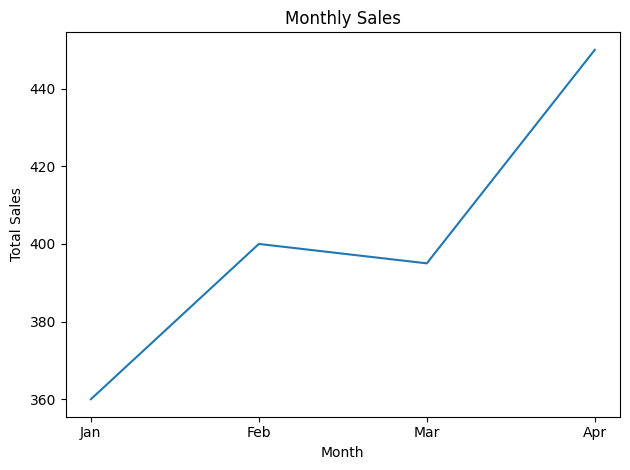

In [ ]:
# 月の順番を整えるための前処理
month_order = {
    "Jan":1, "Feb":2, "Mar":3, "Apr":4,
    "May":5, "Jun":6, "Jul":7, "Aug":8,
    "Sep":9, "Oct":10, "Nov":11, "Dec":12
}
sales['MonthNumber'] = sales['Month'].map(month_order)


In [ ]:
# 月ごとの集計と順番を整える
monthly_sales = sales.groupby(['Month', 'MonthNumber'], as_index=False)['Sales'].sum()
monthly_sales = monthly_sales.sort_values('MonthNumber')

In [ ]:
# 月ごとの可視化（折れ線グラフ）
plt.plot(monthly_sales['Month'], monthly_sales['Sales'])
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

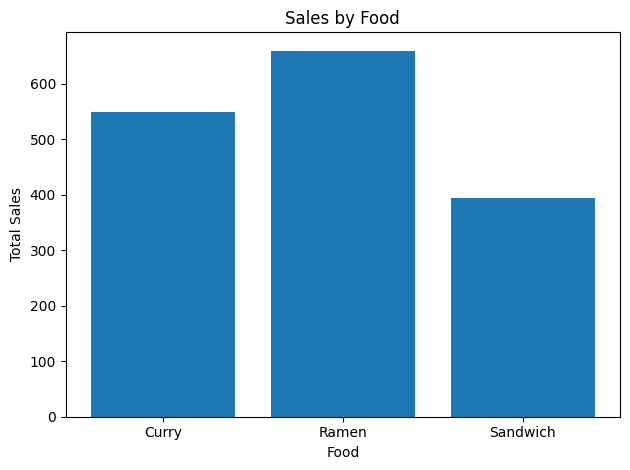

In [ ]:
# 食べ物ごとの集計
food_sales = sales.groupby('Food', as_index=False)['Sales'].sum()

In [ ]:
# 食べ物ごとの可視化（棒グラフ）
plt.bar(food_sales['Food'], food_sales['Sales'])
plt.title('Sales by Food')
plt.xlabel('Food')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

# 今日の学び

## 学んだ内容
- pandasでのデータ操作の基礎
- matplotlibでのデータ可視化
- `groupby` を使った集計処理
- `as_index=False` を使ってDataFrame形式に整える方法

## 少し躓いた点
- `groupby`で集計した時、結果がアルファベット順になってしまった  
- `MonthNumber`列を追加して並べ替えることで解決した

## 所感
- `groupby` で簡単に集計できるのは便利だと感じた
- `as_index=False` を使うと列の扱いがスムーズになり、可視化に使いやすかった
- pandasとmatplotlibを組み合わせると「データ → グラフ」の流れを自分で作れるようになってきた
